Instructor: Jhun Brian M. Andam </br>
Course: DS312 - Data Mining and Application

Name: `Christian Jay Baguio`</br>

# About the Data

#### Context
Collection of Facebook spam-legit profile and content-based data. It can be used for classification tasks.

#### Content
The dataset can be used for building machine learning models. To collect the dataset, Facebook API and Facebook Graph API are used and the data is collected from public profiles. There are 500 legit profiles and 100 spam profiles. The list of features is as follows with Label (0-legit, 1-spam).

1. Number of friends
2. Number of followings
3. Number of Community
4. The age of the user account (in days)
5. Total number of posts shared
6. Total number of URLs shared
7. Total number of photos/videos shared
8. Fraction of the posts containing URLs
9. Fraction of the posts containing photos/videos
10. Average number of comments per post
11. Average number of likes per post
12. Average number of tags in a post (Rate of tagging)
13. Average number of hashtags present in a post
#### Inspiration
Dataset helps the community to understand how features can help to differ Facebook legit users from spam users. 

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
sns.set_theme(font='Times New Roman')

1. Access the following dataset from kaggle and train a machine learning model to predict if a user account is legitimate or fake through facebook online engagements or activities.

    *https://www.kaggle.com/code/jhunbrianandam/classifying-facebook-accounts/input </br>
    *Use KNNClassifier for this activity.

In [35]:
data = pd.read_csv("Facebook Spam Dataset.csv")
data.head()

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.490000,0.550000,0.56,0.47,40,14,1
1,2,150,350,30,300,300,100,290,0.330000,0.960000,0.50,1.20,10,4,0
2,3,300,450,50,465,500,150,450,0.200000,0.840000,0.40,1.50,15,7,0
3,4,25,110,660,350,2050,2000,2050,0.975610,1.000000,0.70,0.30,54,21,1
4,5,24,100,150,800,950,1000,900,1.052632,0.947368,0.66,0.50,55,20,1


In [29]:
#Check for label 1
label_1 = data.loc[(data['Label']) == 1]
label_1.describe()

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0
mean,522.689320,161.446602,160.582524,867.611650,1657.854369,2552.961165,1742.184466,2527.504854,0.652035,0.983604,7.252790,0.393391,40.825243,24.320388,1.0
std,110.674051,372.893028,352.163635,409.584108,636.125025,901.586868,674.075165,903.587283,0.197259,0.054569,65.445401,0.274788,6.357684,4.361628,0.0
min,1.000000,4.000000,1.000000,51.000000,200.000000,524.000000,48.000000,509.000000,0.076800,0.550000,0.364000,0.110000,30.000000,13.000000,1.0
25%,517.500000,26.500000,28.000000,598.000000,999.500000,1999.500000,1479.000000,1989.000000,0.634352,0.994477,0.654000,0.209500,36.000000,22.000000,1.0
50%,544.000000,47.000000,64.000000,841.000000,1840.000000,2751.000000,1897.000000,2740.000000,0.674523,0.997441,0.860000,0.320000,40.000000,25.000000,1.0
75%,571.500000,80.500000,85.000000,1206.000000,2147.000000,3213.000000,2200.500000,3177.500000,0.739228,0.998583,0.978750,0.478800,46.000000,28.000000,1.0
max,599.000000,1632.000000,1765.000000,1789.000000,2610.000000,3896.000000,2956.000000,3891.000000,1.052632,1.000000,665.000000,1.350000,58.000000,32.000000,1.0


In [28]:
#Check for label 0
label_0 = data.loc[(data['Label']) == 0]
label_0.describe()

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,495.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.0
mean,255.267606,1253.891348,1256.865191,70.873239,1122.744467,869.042254,85.321932,829.249497,0.090868,0.956478,0.415698,0.981746,39.901408,14.277666,0.0
std,147.069474,554.460185,567.186342,148.976529,368.424989,433.758090,246.069418,424.741304,0.117999,0.157177,0.204504,0.481538,17.294075,5.360715,0.0
min,2.000000,9.000000,1.000000,12.000000,125.000000,76.000000,11.000000,65.000000,0.011226,0.000000,0.000000,0.102000,10.000000,1.000000,0.0
25%,129.000000,945.000000,954.000000,36.000000,895.000000,562.000000,36.000000,536.000000,0.037835,0.921875,0.254000,0.680000,27.000000,11.000000,0.0
50%,254.000000,1245.000000,1235.000000,51.000000,1102.000000,765.000000,46.000000,741.000000,0.066998,0.963031,0.411000,0.970000,39.000000,14.000000,0.0
75%,378.000000,1520.000000,1564.000000,63.000000,1378.000000,1156.000000,59.000000,1058.000000,0.098194,0.985765,0.530000,1.280000,47.000000,17.000000,0.0
max,601.000000,5554.000000,5312.000000,1589.000000,2697.000000,3625.000000,2466.000000,3594.000000,1.086957,2.739726,1.000000,2.800000,99.000000,30.000000,0.0


In [4]:
data.isna().sum()

profile id         0
#friends           0
#following         0
#community         0
age                0
#postshared        0
#urlshared         0
#photos/videos     0
fpurls             2
fpphotos/videos    0
avgcomment/post    0
likes/post         0
tags/post          0
#tags/post         0
Label              0
dtype: int64

The dataset seems to have a nan value and by that, gonna populate it by its mean value.

In [3]:
df = data.copy()
df= df.fillna(df.mean()) #populate the nan values with the mean of the dataset

In [4]:
df.isna().sum()

profile id         0
#friends           0
#following         0
#community         0
age                0
#postshared        0
#urlshared         0
#photos/videos     0
fpurls             0
fpphotos/videos    0
avgcomment/post    0
likes/post         0
tags/post          0
#tags/post         0
Label              0
dtype: int64

In [7]:
df.corr()

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
profile id,1.000000,-0.337429,-0.327454,0.588565,0.377042,0.510488,0.589259,0.531142,0.527727,0.142110,0.061821,-0.341883,0.042423,0.402321,0.580938
#friends,-0.337429,1.000000,0.896656,-0.637837,-0.158132,-0.549882,-0.671581,-0.553562,-0.678271,-0.044142,-0.064969,0.371951,0.012305,-0.482545,-0.615826
#following,-0.327454,0.896656,1.000000,-0.631990,-0.179921,-0.548512,-0.664396,-0.552570,-0.676368,-0.054927,-0.066612,0.314604,-0.015241,-0.483882,-0.610905
#community,0.588565,-0.637837,-0.631990,1.000000,0.424587,0.799881,0.901187,0.808596,0.868495,0.081380,0.066834,-0.471392,0.028278,0.606165,0.811320
age,0.377042,-0.158132,-0.179921,0.424587,1.000000,0.722748,0.537155,0.714426,0.317575,0.037958,-0.016174,-0.284790,0.088470,0.294551,0.428537
#postshared,0.510488,-0.549882,-0.548512,0.799881,0.722748,1.000000,0.895316,0.993536,0.728283,0.053444,0.051780,-0.600279,0.088522,0.595973,0.760627
#urlshared,0.589259,-0.671581,-0.664396,0.901187,0.537155,0.895316,1.000000,0.901870,0.927181,0.088781,0.059773,-0.481699,0.019191,0.637404,0.868382
#photos/videos,0.531142,-0.553562,-0.552570,0.808596,0.714426,0.993536,0.901870,1.000000,0.739798,0.143607,0.053010,-0.602847,0.081566,0.595507,0.766492
fpurls,0.527727,-0.678271,-0.676368,0.868495,0.317575,0.728283,0.927181,0.739798,1.000000,0.103150,0.076891,-0.389411,-0.015661,0.605781,0.843653
fpphotos/videos,0.142110,-0.044142,-0.054927,0.081380,0.037958,0.053444,0.088781,0.143607,0.103150,1.000000,0.010172,-0.016876,-0.008525,0.022115,0.070529


The corr function shows the match high correlation between number of post shared and number url shared.

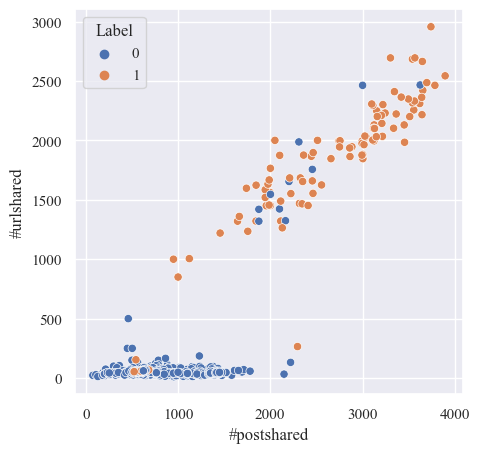

In [5]:
plt.figure(figsize=(5, 5))
sns.scatterplot(df, x='#postshared', y='#urlshared', hue='Label');

Check for dataframe shape

In [12]:
df.shape

(600, 15)

2. Evaluate the model's performance using a single holdout set (70:30).

In [6]:
np.random.seed(32)

# shuffle the dataset
data = df.sample(600)

# make a class map using dictionary comprehension
#class_map = {val:key for key, val in enumerate(data['Label'].unique())}

In [29]:
# replace the categorical values into a numerical ones by
# applying the class_map
#data['Label'] = data['Label'].map(class_map)

In [7]:
train_size = 0.70

# syntax: dataframe.iloc[all rows (:) until (len(holdout) * train_size) and all columns]
train_data = data.iloc[:int(len(data) * train_size), :]

# syntax: dataframe.iloc[last row element until (len(holdout) - len(train_data)) and all columns]
test_data = data.iloc[-(len(data) - len(train_data)):, :]

In [51]:
X_train, y_train = train_data.iloc[:, :-1], train_data['Label']
X_test, y_test = test_data.iloc[:, :-1], test_data['Label']

In [52]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

3. Evaluate the model's performance using k-fold cross validation (7 folds).

In [53]:
def kfold_indices(df, k):
    fold_size = len(df) // k
    indices = np.arange(len(df))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [54]:
indices = kfold_indices(data, 7)

In [55]:
df = df.reset_index(drop=True)
n_neighbors = range(1, 10+1)

for fold, idx in enumerate(indices):
    fold += 1
    train_idx, test_idx = idx
    train_df, test_df = df.loc[train_idx], df.loc[test_idx]
    X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
    X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]
    print(f"FOLD {fold}:")
    for n in n_neighbors:
        clf_kfold = KNeighborsClassifier(n_neighbors=n)
        clf_kfold.fit(X_train, y_train)
        print("n_neighbor: {:^5} accuracy: {:^5}".format(n, round(clf_kfold.score(X_test, y_test), 3)))

FOLD 1:
n_neighbor:   1   accuracy: 0.988
n_neighbor:   2   accuracy: 0.976
n_neighbor:   3   accuracy: 0.988
n_neighbor:   4   accuracy: 0.965
n_neighbor:   5   accuracy: 0.988
n_neighbor:   6   accuracy: 0.988
n_neighbor:   7   accuracy: 0.988
n_neighbor:   8   accuracy: 0.976
n_neighbor:   9   accuracy: 0.976
n_neighbor:  10   accuracy: 0.976
FOLD 2:
n_neighbor:   1   accuracy:  1.0 
n_neighbor:   2   accuracy:  1.0 
n_neighbor:   3   accuracy:  1.0 
n_neighbor:   4   accuracy:  1.0 
n_neighbor:   5   accuracy:  1.0 
n_neighbor:   6   accuracy:  1.0 
n_neighbor:   7   accuracy:  1.0 
n_neighbor:   8   accuracy:  1.0 
n_neighbor:   9   accuracy:  1.0 
n_neighbor:  10   accuracy:  1.0 
FOLD 3:
n_neighbor:   1   accuracy:  1.0 
n_neighbor:   2   accuracy:  1.0 
n_neighbor:   3   accuracy:  1.0 
n_neighbor:   4   accuracy:  1.0 
n_neighbor:   5   accuracy:  1.0 
n_neighbor:   6   accuracy:  1.0 
n_neighbor:   7   accuracy:  1.0 
n_neighbor:   8   accuracy:  1.0 
n_neighbor:   9   accura

4. You must use all the provided metrics for classification.

In [56]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.96      0.99      0.97        78

    accuracy                           0.95        85
   macro avg       0.88      0.78      0.82        85
weighted avg       0.95      0.95      0.95        85



In [59]:
clf.predict([[602,40,300,907,200,800,750,922,0.490000,0.550000,0.56,0.47,40,14]])

C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [60]:
#Calculate and print all metrics
accuracy = accuracy_score(y_test, y_pred) #get the accuracy of y_test and the y_predicted

#get the ratio of true positive predictions to the total predicted positives of y_test and the y_predicted
precision = precision_score(y_test, y_pred) 

#get the ratio of true positive predictions to the total actual positives. of y_test and the y_predicted
recall = recall_score(y_test, y_pred) 

f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred) #get the harmonic mean of precision and recall.

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.95
Precision: 0.96
Recall: 0.99
F1 Score: 0.97
Confusion Matrix:
[[ 4  3]
 [ 1 77]]


# Confusion Matrix

##### NOTE!!!
* True Positive (TP): Instances that are actually positive and predicted as positive.
* True Negative (TN): Instances that are actually negative and predicted as negative.
* False Positive (FP): Instances that are actually negative but predicted as positive.
* False Negative (FN): Instances that are actually positive but predicted as negative.

 `|                 | Predicted Not Spam | Predicted Spam     |` </br>
 `| Actual Not Spam | True Not Spam: 4   | False Spam: 3      |` </br>
 `| Actual Spam     | False Not Spam: 1  | True Spam: 77      |` </br>